import pandas as pd

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [9]:
df=pd.DataFrame({"rest":["chA","chB","chC","chD","chE","chF","chI"],"dej":[3,6,9,5,10,16,18],"jours":[1,3,5,3,7,8,10]})

In [10]:
from sklearn import preprocessing

In [11]:
print(df)

  rest  dej  jours
0  chA    3      1
1  chB    6      3
2  chC    9      5
3  chD    5      3
4  chE   10      7
5  chF   16      8
6  chI   18     10


In [12]:
df.drop(columns="rest",inplace=True)

In [13]:
import seaborn as sns

In [14]:
df.head()

,dej,jours
0,3,1
1,6,3
2,9,5
3,5,3
4,10,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
dej      7 non-null int64
jours    7 non-null int64
dtypes: int64(2)
memory usage: 152.0 bytes


In [16]:
df.describe()

,dej,jours
count,7.000000,7.000000
mean,9.571429,5.285714
std,5.623082,3.199702
min,3.000000,1.000000
25%,5.500000,3.000000
50%,9.000000,5.000000
75%,13.000000,7.500000
max,18.000000,10.000000


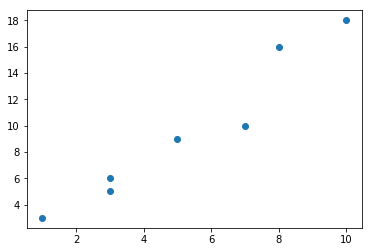

In [17]:
plt.scatter(df['jours'],df['dej'])

In [18]:
feature = df.iloc[:,:-1].values

In [19]:
labels = df.iloc[:,1].values

In [20]:
print('Shape of Feature:',feature.shape)

Shape of Feature: (7, 1)


In [21]:
print('Shape of Labels:', labels.shape)

Shape of Labels: (7,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
x_train, x_test, y_train, y_test = train_test_split(feature,labels,test_size = 0.3,random_state=0)

In [25]:
reg = LinearRegression()

In [26]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
y_pred=reg.predict(x_test)

In [28]:
print(y_pred)

[9.87623762 5.01980198 3.4009901 ]


In [29]:
y_pred = reg.predict(x_train)

In [30]:
print(y_pred)

[2.86138614 1.78217822 8.7970297  5.55940594]


In [31]:
y_predtest = reg.predict(x_test)

In [32]:
print('Train Accuracy :', reg.score(x_train,y_train))

Train Accuracy : 0.8979668959262338


In [33]:
print('Test Accuracy :', reg.score(x_test,y_test))

Test Accuracy : 0.993211449857857


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



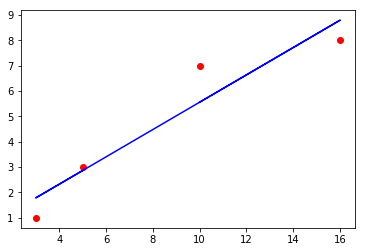

In [66]:
plt.scatter(x_train,y_train,color='r')

plt.plot(x_train,reg.predict(x_train),color='b')

plt.show()

C:\Users\P4\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


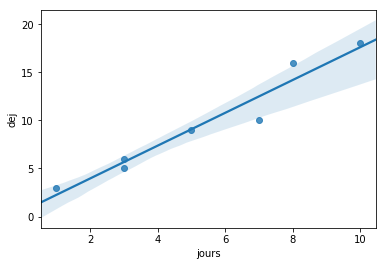

In [67]:
sns.regplot(x="jours",y="dej",fit_reg=True,data=df)

In [37]:
feature= feature.reshape(-1,1)

In [38]:
y_pred_featuretest = reg.predict(feature)

In [39]:
print(feature)

[[ 3]
 [ 6]
 [ 9]
 [ 5]
 [10]
 [16]
 [18]]


In [40]:
print(y_pred_featuretest)

[1.78217822 3.4009901  5.01980198 2.86138614 5.55940594 8.7970297
 9.87623762]


In [41]:
df.tail()

,dej,jours
2,9,5
3,5,3
4,10,7
5,16,8
6,18,10


In [42]:
print('Test Accuracy :', reg.score(x_train,y_pred))

Test Accuracy : 1.0


#logistic regression

In [43]:
from sklearn.linear_model import LogisticRegression

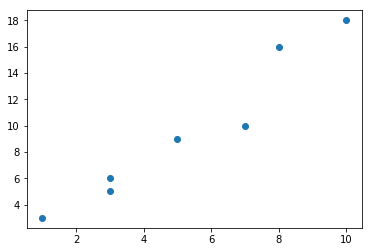

In [44]:
plt.scatter(df['jours'],df['dej'])

In [45]:
feature = df.iloc[:,:-1].values

In [46]:
labels = df.iloc[:,1].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(feature,labels,test_size = 0.3,random_state=0)

In [49]:
classifier=LogisticRegression(random_state=0)

In [50]:
classifier.fit(x_train,y_train)

C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\P4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_predtrain = reg.predict(x_train)

In [52]:
print(y_predtrain)

[2.86138614 1.78217822 8.7970297  5.55940594]


In [53]:
y_predtest=classifier.predict(x_test)

In [54]:
print(y_predtest)

[8 8 8]


In [55]:
from sklearn.metrics import confusion_matrix

<BarContainer object of 7 artists>

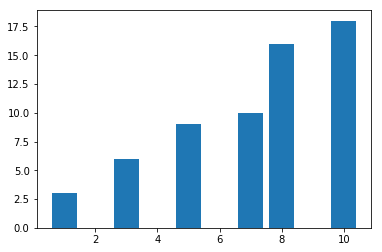

In [58]:
plt.bar(df["jours"],df["dej"])

In [59]:
x=df["jours"]
y=df["dej"]

In [60]:
x_train

array([[ 5],
       [ 3],
       [16],
       [10]], dtype=int64)

In [61]:
x

0     1
1     3
2     5
3     3
4     7
5     8
6    10
Name: jours, dtype: int64

In [62]:
y_pred

array([2.86138614, 1.78217822, 8.7970297 , 5.55940594])

In [63]:
y

0     3
1     6
2     9
3     5
4    10
5    16
6    18
Name: dej, dtype: int64

In [64]:
y_train

array([3, 1, 8, 7], dtype=int64)

In [172]:
feature

array([[ 3],
       [ 6],
       [ 9],
       [ 5],
       [10],
       [16],
       [18]], dtype=int64)

In [173]:
labels

array([ 1,  3,  5,  3,  7,  8, 10], dtype=int64)

In [174]:
y_test

array([10,  5,  3], dtype=int64)